# I. Logistic Regressions

Logistic regression is a type of generalized linear model (GLM) that uses the logistic function to model the probability of a binary outcome. The logistic function is an S-shaped curve that maps the linear combination of the independent variables to the probability of the outcome.

The exponential of a linear model is a function that takes the linear combination of the independent variables and raises it to the power of e. In the case of logistic regression, the exponential of the linear model is used to predict the odds of the outcome. The odds of an outcome are the ratio of the probability of the outcome occurring to the probability of the outcome not occurring.

So, the explanation that logistic regression is the exponential of a linear model that predicts odds is accurate. It is a concise way of describing how logistic regression works.

Here is a more detailed explanation of how logistic regression works:

The first step in logistic regression is to fit a linear model to the data. The linear model is a set of coefficients that multiplies the independent variables and adds a constant term.
The second step is to apply the logistic function to the linear model. The logistic function takes the linear combination of the independent variables and maps it to a value between 0 and 1.
The value between 0 and 1 is the probability of the outcome occurring.
Logistic regression is a powerful tool for predicting binary outcomes. It is used in a wide variety of applications, including marketing, finance, and healthcare.

## Import the relevant libraries

In [18]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#Apply fix to the statsmodels library
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

## Load the data

In [7]:
raw_data = pd.read_csv('2.01. Admittance.csv')

In [8]:
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes':1,'No':0})
data

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0
...,...,...
163,1722,1
164,1750,1
165,1555,0
166,1524,0


## Declare the dependent and the independent variables

In [9]:
y = data['Admitted']
x1 = data['SAT']

## Plotting the Data

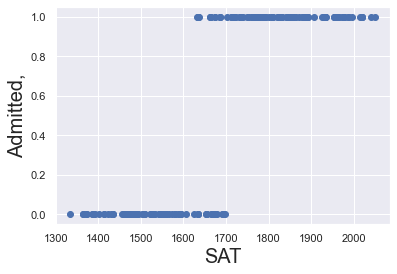

In [11]:
plt.scatter(x1,y,color='C0')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('Admitted,', fontsize =20)
plt.show()

### Plot with a Regression Line

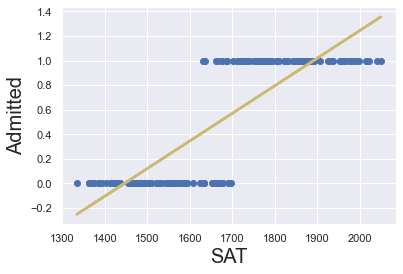

In [13]:
x = sm.add_constant(x1)
reg_lin = sm.OLS(y,x)
results_lin = reg_lin.fit()

plt.scatter(x1,y,color = 'C0')
y_hat = x1*results_lin.params[1]+results_lin.params[0]

plt.plot(x1,y_hat,lw=2.5, color='C8')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('Admitted', fontsize = 20)
plt.show()

## Regression

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


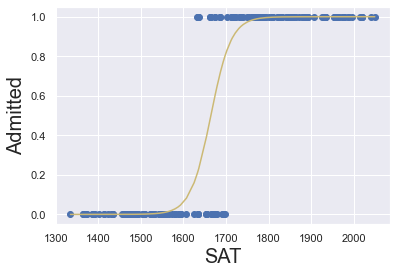

In [15]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1) / (1 + np.exp(b0+x*b1)))

f_sorted = np.sort(f(x1, results_log.params[0], results_log.params[1]))
x_sorted = np.sort(np.array(x1))

plt.scatter(x1,y,color='C0')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('Admitted', fontsize = 20)
plt.plot(x_sorted, f_sorted, color='C8')
plt.show()

Logistic regression curve shows the probability of Admission based on SAT score. There is a certain probability around uncertain indepdedent factors and the probability of the dependent variable falling between 0 or 1 (Example: In this logistic regression curve, we see that a score of 1650 would be around a 20% chance for Admittance vs an SAT score of 1700 which could net an 80% chance for Admittance

## Logistic Regression Assumptions

Logistic Regressions predict the probability of an event occurring.

## Logistic Regression Model Formula

## $p(x) = \frac{{e}({\beta_0} + {\beta_1}{x_1}+...+{\beta_k}{x_k})}{1+{e}({\beta_0} + {\beta_1}{x_1}+...+{\beta_k}{x_k})}$

## Logit Regression Model Formula

## $\frac{p(x)}{1-p(x)}  = {e}^{({\beta_0} + {\beta_1}{x_1}+...+{\beta_k}{x_k})}$

The probability of something happening divided by the odds of something not happening

## Logit (Took the Log of the Logit Regression Formula)
## $log(\frac{p(x)}{1-p(x)})  = {\beta_0} + {\beta_1}{x_1}+...+{\beta_k}{x_k}$

The Log of the odds is equal to the linear model. Basically, Logisitic regression is the exponential of a linear model that predicts odds?

The Logit Model is much simpler of a formula as it has been simplified.

#### Regression

In [16]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


This means we managed to fit the regression. It took 10 iterations and current function value shows the value of the objective function.

There's always the possibility the model will no longer learn. The max number of iterations is 35 in stats models and afterwards will post an error message.

In [19]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Tue, 25 Jul 2023   Pseudo R-squ.:                  0.7992
Time:                        11:46:50   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

## Interpreting Logistic Regression Summary

**Likelihood Function:** A function which estimates how likely it is that the model at hand describes the real udnerlying relationship of the variables (The bigger the likelihood function, the higher the probability that the model is correct).

**MLE (Maximum Likelihood Estimation):** MLE tries to maximize the likelihood function to ensure a higher probability for the model to be correct. The computer is going through different values, until it finds a model, for which the likelihood is highest. When it can no longer improve the model, it will jsut stop optimizing (thus the 10 iterations above and 35 iteration max for statsmodels).

**Pseudo ${R^2}$ (McFaddens ${R^2}$):** There is no such thing as a meaningful $R^2$ for a logistic regression. Some terms we might. A good Pseudo ${R^2}$ is somewhere between 0.2 and 0.4. This measure is mostly useful for comparing variations of the same model. Different models will have completely different and incomparable Pseudo ${R^2}$.

**Log-Likelihood:** More popular metric: The value of the log likelihood is almost but not always negative (the bigger it is, the better)

**LL-Null:** The log-likelihood of the model which as no independent variables the same y is the dependent variable of that model, but the sole independent variable of the model is an array of 1's, this is the constant we are adding with the **add constant method**:

### $y = \beta_{0}*1$

**LLR p-value (Log Likelihood Ratio Test):** Base don the log likelihood of the model and the LL-Null. It measures if our model is statistically different from LL-Null (AKA useless model). The LLR p-value has to be less than 5%

In [20]:
#LL-Null Log Likelihood
x0 = np.ones(168)
reg_log = sm.Logit(y,x0)
results_log = reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.686044
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      167
Method:                           MLE   Df Model:                            0
Date:                Tue, 25 Jul 2023   Pseudo R-squ.:               7.410e-11
Time:                        12:05:04   Log-Likelihood:                -115.26
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2392      0.155      1.539      0.124      -0.065       0.544
==============================================================================
"""

# Regression Summary (Understanding Coefficients)

In [22]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Tue, 25 Jul 2023   Pseudo R-squ.:                  0.7992
Time:                        12:40:44   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

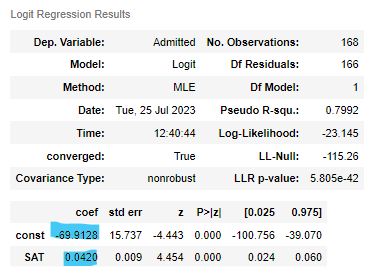

#### Logit Model for this exercise:


## $log(\frac{p(\pi)}{1-p(\pi)})  = -69.91 + 0.042 * SAT$

## $log(\frac{odds_2}{odds_1}) = 0.042(SAT_2 - SAT_1)$

## Difference of 1 unit of SAT:

### $log(\frac{odds_2}{odds_1})$ = 0.042


### ${e}^{log(\frac{odds_2}{odds_1})} = {e}^{0.042}$


### $odds_2 = {104.2} * odds_1$

### When the SAT score increases by 1, the odds of admittance increases by 4.2%

## $\Delta{odds} = {e}^{b_k}$: For a unit change in a variable; the change in the odds equal the exponential of a coefficient.

# II. Binary Predictors in a Logistic Regression

In [23]:
raw_data = pd.read_csv('2.02. Binary predictors.csv')
raw_data

,SAT,Admitted,Gender
0,1363,No,Male
1,1792,Yes,Female
2,1954,Yes,Female
3,1653,No,Male
4,1593,No,Male
...,...,...,...
163,1722,Yes,Female
164,1750,Yes,Male
165,1555,No,Male
166,1524,No,Male


In [26]:
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes': 1, 'No': 0})
data['Gender'] = data['Gender'].map({'Female': 1, 'Male': 0})
data

,SAT,Admitted,Gender
0,1363,0,0
1,1792,1,1
2,1954,1,1
3,1653,0,0
4,1593,0,0
...,...,...,...
163,1722,1,1
164,1750,1,0
165,1555,0,0
166,1524,0,0


## Declare Dependent and Independent Variables

In [28]:
y = data['Admitted']
x1 = data['Gender']

## Regression

In [29]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.572260
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Tue, 25 Jul 2023   Pseudo R-squ.:                  0.1659
Time:                        13:39:39   Log-Likelihood:                -96.140
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 6.283e-10
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6436      0.222     -2.901      0.004      -1.078      -0.209
Gender         2.0786      0.363      5.727      0.000       1.367       2.790
==============================================================================
"""

From the LLR p-value being less than 5%, we can determine that the model is significant. We can also assume that the Gender coefficient is signficant from the p to z value by being less than 5%

From this interpretation, the formula would be:

#### log(odds) = -0.64 +2.08 * Gender

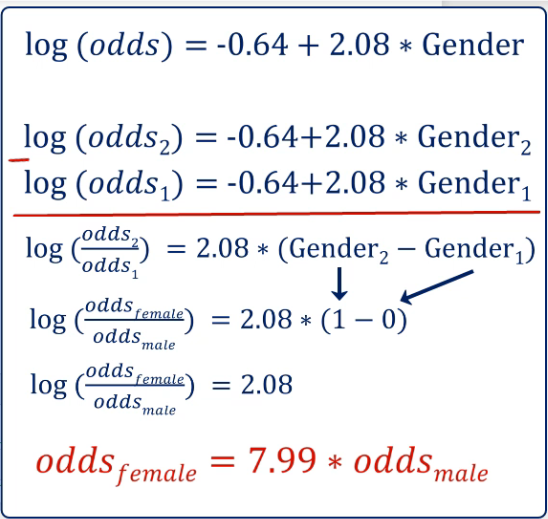

#### Applying $\Delta{odds} = {e}^{b_k}$:

In [30]:
np.exp(2.0786)

7.993270498536442

The above explains that the odds of a female is 7.99 times the odds of a male getting admitted into college based off of the coefficients from the Logistic Regression Model using only Gender as a feature. We will look at SAT Score and Gender in an updated Logistic Regression:

# New Regression

In [31]:
y = data['Admitted']
x1 = data[['SAT','Gender']]

In [32]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.120117
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      165
Method:                           MLE   Df Model:                            2
Date:                Tue, 25 Jul 2023   Pseudo R-squ.:                  0.8249
Time:                        14:22:54   Log-Likelihood:                -20.180
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.118e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -68.3489     16.454     -4.154      0.000    -100.598     -36.100
SAT            0.0406      0.010      4.129      0.000       0.021       0.060
Gender         1.9449      0.846      2.299      0.022       0.287       3.603
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In this summary table, we see that Log-Likelihood is much higher than before when the only feature was gender. Now in this model, though Gender is still a significant coefficient, the SAT coefficient p-value shows more signficance towards the model.

#### Applying $\Delta{odds} = {e}^{b_k}$:

In [34]:
np.exp(1.9449)

6.992932526814459

The exponential of the Gender coefficient is around 7 (6.99), which is still a significant impact. This means that given the SAME SAT score, the odds of a woman being admitted to college is still high at 6.99 times the odds of a man getting admitted.

**Real World Application/ Interpretation**
Universities place quotas on admittance, but certain departments have different gendered ratios (the more inclined one gender is to a certain major, the odds of the opposite gender being admitted are higher). As of 2023:

Communications - Predominantly female, which means males have an easier time being admitted to Communications Major Studies

STEM - Predominantly male, which means females have an easier time beign admitted to STEM Majors.

## Accuracy

If we predict results_log, we would get all of the predicted values:

In [35]:
#Formatting
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})
results_log.predict()

array([0.00, 1.00, 1.00, 0.23, 0.02, 0.99, 1.00, 1.00, 1.00, 0.01, 1.00,
       1.00, 0.76, 0.00, 0.60, 1.00, 0.11, 0.12, 0.51, 1.00, 1.00, 1.00,
       0.00, 0.01, 0.97, 1.00, 0.48, 0.99, 1.00, 0.99, 0.00, 0.83, 0.25,
       1.00, 1.00, 1.00, 0.31, 1.00, 0.23, 0.00, 0.02, 0.45, 1.00, 0.00,
       0.99, 0.00, 0.99, 0.00, 0.00, 0.01, 0.00, 1.00, 0.92, 0.02, 1.00,
       0.00, 0.37, 0.98, 0.12, 1.00, 0.00, 0.78, 1.00, 1.00, 0.98, 0.00,
       0.00, 0.00, 1.00, 0.00, 0.78, 0.12, 0.00, 0.99, 1.00, 1.00, 0.00,
       0.30, 1.00, 1.00, 0.00, 1.00, 1.00, 0.85, 1.00, 1.00, 0.00, 1.00,
       1.00, 0.89, 0.83, 0.00, 0.98, 0.97, 0.00, 1.00, 1.00, 0.03, 0.99,
       0.96, 1.00, 0.00, 1.00, 0.01, 0.01, 1.00, 1.00, 1.00, 0.00, 0.00,
       0.02, 0.33, 0.00, 1.00, 0.09, 0.00, 0.97, 0.00, 0.75, 1.00, 1.00,
       0.01, 0.01, 0.00, 1.00, 0.00, 0.99, 0.57, 0.54, 0.87, 0.83, 0.00,
       1.00, 0.00, 0.00, 0.00, 1.00, 0.04, 0.00, 0.01, 1.00, 0.99, 0.52,
       1.00, 1.00, 0.05, 0.00, 0.00, 0.00, 0.68, 1.

In the above, these are the values of $\pi$:the probability of being admitted
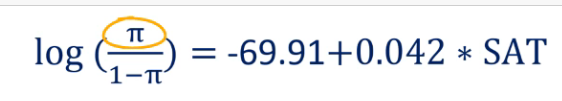

In [36]:
#Actual Values of the dataset
np.array(data['Admitted'])

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0], dtype=int64)

By this logic, the predicted values in results_log.predict() and the actual values of np.array(data['Admitted']) can be compared to know the accuracy of the model. For the predicted probilities you round up to 1 and down to 0. We can summarize this by using:

**sm.LogitResults.pred-table():** returns a table which compares predicted and actual values:

In [38]:
#Confusion Matrix
cm_df = pd.DataFrame(results_log.pred_table())
cm_df.columns= ['Predicted 0','Predicted 1']
cm_df = cm_df.rename(index = {0:'Actual 0' ,  1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,69.0,5.0
Actual 1,4.0,90.0


## Confusion Matrix

**Confusion Matrix:** A table that shows how "confused" a model was by comparing false positives and false negatives as well as correctly predicted entries.

**Reading the table:**
1. For 69 observations, the model predicted 0 and the true value was 0
2. For 90 observations, the model predicted 1 and the true value was 1
3. for 4 observations, the model predicted 0 while the true value was 1
4. for 5 observations, the model predicted 1 while the true value was 0

In 9 cases, the model got confused.

Simple accuracy calculation from this table: $\frac{159}{168}= {.946}$ = 94.6% Accuracy


Below is the way to code accuracy calculations for Logistic Regressions:

In [39]:
#putting the confusion matrix from above into an array
cm = np.array(cm_df)
accuracy_train = (cm[0,0]+cm[1,1])/cm.sum()
accuracy_train

0.9464285714285714

## Underfitting and Overfitting

**Underfitting:** The model has not captured the underlying logic of the data

**Overfitting:** Our training has focused on the particular training set so much it has "missed the point"

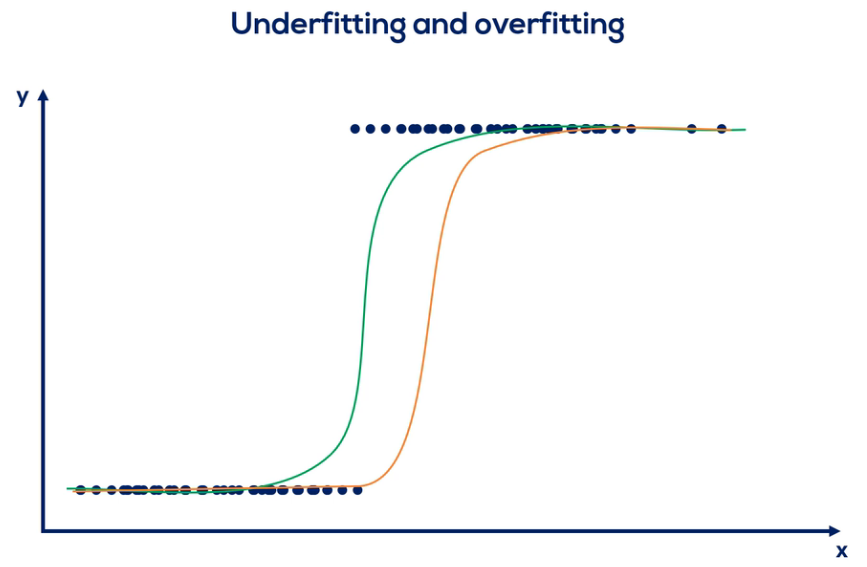

One popular solution to overfitting: split the initial dataset into two - training and test

# III. Model Testing

#### Testing the Model and Assessing its Accuracy

In [46]:
test = pd.read_csv('2.03. Test dataset.csv')
test

,SAT,Admitted,Gender
0,1323,No,Male
1,1725,Yes,Female
2,1762,Yes,Female
3,1777,Yes,Male
4,1665,No,Male
5,1556,Yes,Female
6,1731,Yes,Female
7,1809,Yes,Female
8,1930,Yes,Female
9,1708,Yes,Male


In [47]:
test['Admitted'] = test['Admitted'].map({'Yes':1, 'No': 0})
test['Gender'] = test['Gender'].map({'Female':1, 'Male': 0})
test

,SAT,Admitted,Gender
0,1323,0,0
1,1725,1,1
2,1762,1,1
3,1777,1,0
4,1665,0,0
5,1556,1,1
6,1731,1,1
7,1809,1,1
8,1930,1,1
9,1708,1,0


1. We will use our model to make predictions based on the test data
2. We will compare those with actual outcomes
3. Calculate the accuracy
4. Create a confusion matrix

In [48]:
x

,const,SAT,Gender
0,1.0,1363,0
1,1.0,1792,1
2,1.0,1954,1
3,1.0,1653,0
4,1.0,1593,0
...,...,...,...
163,1.0,1722,1
164,1.0,1750,0
165,1.0,1555,0
166,1.0,1524,0


In [50]:
test_actual = test['Admitted']
test_data = test.drop(['Admitted'], axis=1)
test_data = sm.add_constant(test_data)
#test_data = x.columns.values in case we ever need to update the dataframe to match
test_data

,const,SAT,Gender
0,1.0,1323,0
1,1.0,1725,1
2,1.0,1762,1
3,1.0,1777,0
4,1.0,1665,0
5,1.0,1556,1
6,1.0,1731,1
7,1.0,1809,1
8,1.0,1930,1
9,1.0,1708,0


statsmodels does not provide testing as a functionality unlike SKLearn. Manually creating a function called **Confusion Matrix:**

In [55]:
#Define function and inputs
def confusion_matrix(data, actual_values, model):
    #predicted values are determined by feeding data into the model
    pred_values = model.predict(data)
    bins=np.array([0,0.5,1])
    cm = np.histogram2d(actual_values,pred_values, bins=bins)[0]
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    return cm, accuracy

In [57]:
cm = confusion_matrix(test_data, test_actual, results_log)
cm_df = pd.DataFrame(cm[0])
cm_df.columns= ['Predicted 0','Predicted 1']
cm_df = cm_df.rename(index = {0:'Actual 0' ,  1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,5.0,1.0
Actual 1,1.0,12.0


In this example, the model accuracy is 89% (pretty good score off of two coefficients (SATs and Gender). The Confusion Matrix Above basically indicates that 17 correct values were predicted while two fell into false positive or false negative based on the model's prediction.

Wrong predictions fall into a ${Misclassification}  {Rate} = \frac{missclassified}{all elements}$

In [60]:
print('Missclassification Rate: ' +str((1+1)/19))

Missclassification Rate: 0.10526315789473684


10.4% of predictions can be expected to be missclassified using this model